# Teoría del Error
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

## Acumulación
En los métodos numéricos y en general en investigación científica es de mucha importancia conocer el efecto acumulado de los errores en la incertidumbre de una función matemática.

## Agenda
1. Propagación
1. Método iterativo
1. Convergencia
1. Estabilidad

In [1]:
# Importar módulos al cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt

# Definir e incluir nuevas funciones al cuaderno
def _significativas(valor, cifras):
    ''' Reducir un valor a un numero de cifras significativas '''
    Primera_significativa = -int(m.floor(m.log10(abs(valor))))
    decimales = Primera_significativa + cifras - 1
    return round(valor, decimales)

def _normalizar(valor, referencia):
    ''' Aproximar un numero a las cifras significativas de la referencia'''
    Primera_significativa = -int(m.floor(m.log10(abs(referencia))))
    cifras = Primera_significativa + 1
    return _significativas(valor, cifras)

def _zeros(a, b, c):
    # Raíces de la ecuación
    t1 = (- b + (b**2-4*a*c)**(1/2)) / (2*a)
    t2 = (- b - (b**2-4*a*c)**(1/2)) / (2*a)
    return t1, t2

## 1. Propagación
---
En matemáticas la propagación del error es el efecto de variación en la incertidumbre de la variable dependiente dada una incertidumbre en alguna de las variables independientes. A continuación, se define el problema para una función lineal y de n variables independientes.

\begin{align}
y &= f \left( x_1 \pm \Delta x_1, x_2 \pm \Delta x_2, ... , x_n \pm \Delta x_n \right) \\
\Delta y &= \left| \frac{\partial f}{\partial x}\right| \Delta x + \left| \frac{\partial f}{\partial y}\right| \Delta y + ... + \left| \frac{\partial f}{\partial y}\right| \Delta y
\end{align}

>**NOTA:** Típicamente estas funciones en investigación científica son complejas y no son lineales; por lo que se requieren técnicas de linealización aproximada, usando para ello instrumentos matemáticos como la expansión de términos en series.

### <code>Ejemplo:</code> Modelo de gravitación básico
---
Cálculo del error de propagación en la gravedad, calculada como un valor aparente <code> \[ga\] </code> a partir de un conjunto de medidas del periodo de oscilación en un sistema de péndulo simple con longitud conocida.

\begin{align}
To & = 2 \pi \sqrt{\frac{ L}{ga}} \\
ga(To) & = 4\pi^2 L\frac{1}{T_o^2} \\
ga(To) & = 4\pi^2 L T_o^{-2} \\
\Delta ga & = \left| \frac{\partial ga}{\partial T_o}\right| \Delta T_o \\
\frac{\partial ga}{\partial T_o} & = -2 (4\pi^2 L) T_o^{-3}\\
\end{align}

In [2]:
# Modelo de gravitación Básico
# Medidas directas de longitud y ángulo en el experimento
Longitud = 1; θ = 45; deltaT = 0.30

# Medidas directas del periodo cada 30 segundos
Tr = [2.106, 2.101, 2.098, 2.087, 2.073, 2.070, 2.064, 2.059, 2.057, 2.052]

# Valores reales
Lat = 1.209673                                                      # Latitud de (Pasto - Nariño)
Alt = 2_539                                                         # Altitud de (Pasto - Nariño)
R = 6_371_000                                                       # Radio medio de la tierra
Afc = 1 + 0.0053024 * m.sin(Lat)**2 - 0.0000058 * m.sin(2*Lat)**2   # Aporte de la fuerza centrifuga
Afg = 1 - (2/R)*Alt + (3/R**2)*Alt**2                               # Aporte de la distancia al centro
g = 9.780327 * Afc * Afg

# Péndulo Simple
Ti = np.array(Tr)               # Periodo (Medida directa)
θ_rad = θ * (m.pi/180)          # Conversión del ángulo a radianes (~Medida directa)
To = Ti / (1 + (θ_rad/4)**2)    # Corrección para ángulos grandes (~Medida directa)
K = 4 * Longitud * m.pi**2      # Constante de proporcionalidad (~Medida directa)    

# Medida indirecta o aparente de la gravedad
ga = K / To**2

# Valores periodo
μT = sum(To) / len(To)                      # Valor promedio
DT = (sum((μT - To)**2) / len(To))**(1/2)   # Desviación estándar
ΔT = _significativas(DT, 1)                 # Incertidumbre del periodo (calculada de los datos)
μT_n = _normalizar(μT, ΔT)                  # Valores medios normalizados

# Valores gravedad aparente
μg = sum(ga) / len(ga)                                  # Valor promedio
Dg = (sum((μg - ga)**2) / len(ga))**(1/2)               # Desviación estándar
dga_dTo = -2 * (4 * Longitud * m.pi**2) * (μT_n)**(-3)  # Derivada
dg = abs(dga_dTo) * ΔT                                  # Calculo de la propagación del Error                               
Δg = _significativas(dg, 1)                             # Incertidumbre de la gravedad aparente
μg_n = _normalizar(μg, Δg)                              # Valores medios normalizados

# Salida estándar
print(f"-----------------------------------------------")
print(f"Valor promedio de T:           {μT:8.4f}")
print(f"Incertidumbre del grupo T:     {DT:8.4f}")
print(f"Valor aparente del grupo:      {μT_n:8.4f} ± {ΔT}")
print(f"-----------------------------------------------")
print(f"Valor promedio de g:           {μg:8.4f}")
print(f"Incertidumbre del grupo g:     {Dg:8.4f}")
print(f"Incertidumbre propagada:       {dg:8.4f}")
print(f"Valor aparente del grupo:      {μg_n:8.4f} ± {Δg}")
print(f"-----------------------------------------------")
print(f"Valor del modelo algebraico:   {g:8.4f}")
print(f"-----------------------------------------------")


-----------------------------------------------
Valor promedio de T:             1.9996
Incertidumbre del grupo T:       0.0181
Valor aparente del grupo:        2.0000 ± 0.02
-----------------------------------------------
Valor promedio de g:             9.8759
Incertidumbre del grupo g:       0.1782
Incertidumbre propagada:         0.1974
Valor aparente del grupo:        9.9000 ± 0.2
-----------------------------------------------
Valor del modelo algebraico:     9.8179
-----------------------------------------------


## 2. Método iterativo
---
Un método iterativo es un algoritmo que trata de resolver un problema matemático; como una ecuación o un sistema de ecuaciones, mediante aproximaciones sucesivas; empezando desde una estimación inicial o semilla <code> \[Ko\]</code>; de forma que cada valor <code>\[Kn\]</code> es función del valor de prueba anterior.

\begin{align}
x_n & = x \left( K_n \right) \\
K_n & = f \left( x_{n-1} \right), \ \ (k>1) \\
\end{align}

>**NOTA:** Estos métodos son útiles para resolver problemas en sistemas complejos; que involucran un número muy grande de variables y comportamientos no lineales; que tendrían un [costo computacional](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_la_complejidad_computacional) prohibitivo empleando métodos directos.

### <code>Ejemplo:</code> Movimiento Parabólico
---
Cálculo de la distancia maxima que recorre un objeto en movimiento parabólico, que parte de una altura <code>\[ho\]</code>, con una velocidad inicial <code>\[Vo\]</code> y un angulo de partida <code>\[θ\]</code>.

In [3]:
# [Definición del problema]
# Ecuación de la altura para el movimiento parabólico
def altura(θ, Vo, ho, t):
    g = 9.8179
    Voy = Vo * np.sin(θ*np.pi/180)
    y = -(1/2) * g * t**2 + Voy * t + ho
    return y

# Intervalos
Angulo_partida = 45
Velocidad_inicial = 12
altura_inicial = 3
ti = 0
tf = 3

# Renombrar la función
F = lambda t: altura(45, 12, 3, t)          

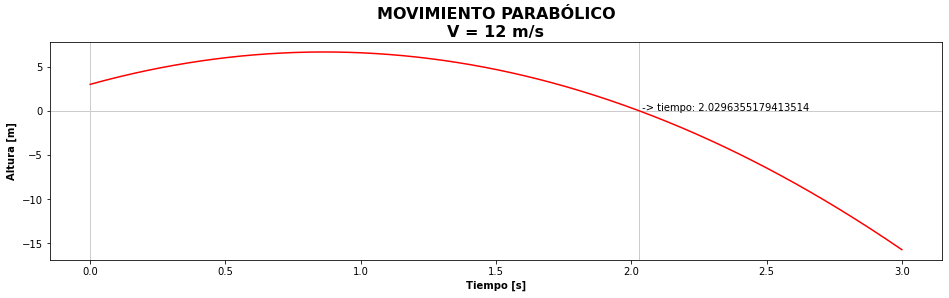

In [4]:
# [Solución algebraica]
""" Uno problema sencillo es la evaluación de una función en un punto dado. 
La solución algebraica en este caso es posible a un bajo costo computacional,
pero es util para ejemplificar el concepto de método iterativo. """
# Ecuación de tiempo de vuelo para el movimiento parabólico
def tiempo(θ, Vo, ho):
    g = 9.8179
    Voy = Vo * np.sin(θ*np.pi/180)
    t = abs(_zeros(-g/2, Voy, ho)[1])
    return t

# [Solución gráfica]
t = np.linspace(ti, tf, 1024, endpoint=True)    
S = altura(Angulo_partida, Velocidad_inicial, altura_inicial, t)
t_ho = tiempo(Angulo_partida, Velocidad_inicial, altura_inicial)
plt.figure(figsize=(16, 4))
plt.axhline(y = 0, linewidth=1.0, color="#ccc")
plt.axvline(x = 0, linewidth=1.0, color="#ccc")
plt.axvline(x = t_ho, linewidth=1.0, color="#ccc")
plt.plot(t, S, color="#F00")

# Textos en la gráfica
plt.title("Movimiento Parabólico\n".upper() + 
         f"V = {Velocidad_inicial} m/s", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [s]", fontweight="bold")
plt.ylabel("Altura [m]", fontweight="bold")
plt.text(t_ho, 0, f" -> tiempo: {t_ho}")
plt.show()

In [5]:
# [Acotar el intervalo de búsqueda]
""" Encontrar dos enteros consecutivos en donde ocurre un cambio de signo. """

# Ciclo while
""" este bucle evalúa una condición y si es verdadera, ejecuta el bloque de código interno.
Continúa evaluando y ejecutando mientras la condición sea verdadera. """
i = 0 # Variable para contar iteraciones
while True:
    if F(i) * F(i+1) < 0:
        break # Termina el ciclo
    else:
        i += 1

# Salida
Kmin = i
Kmax = i+1
Fi = F(Kmin)
Fs = F(Kmax)

# Salida
print(f"---------------------------------")
print(f"|      INTERVALO ENCONTRADO     |")
print(f"|     Iteraciones = {i}           |")
print(f"---------------------------------")
print(f"| Punto mínimo  ->  ({Kmin},{Fi:7.2f}) |")
print(f"| Punto máximo  ->  ({Kmax},{Fs:7.2f}) |")
print(f"---------------------------------")


---------------------------------
|      INTERVALO ENCONTRADO     |
|     Iteraciones = 2           |
---------------------------------
| Punto minimo  ->  (2,   0.33) |
| Punto maximo  ->  (3, -15.72) |
---------------------------------


In [6]:
# Defino el método iterativo
def iterativo(Xmin, Xmax, Imax):
    """ Método para encontrar raíces en un intervalo.

        ## Parámetros:
            Xmin (Int): limite inferior del intervalo.
            Xmax (Int): limite superior del intervalo.
            Imax (Int): número máximo de iteraciones.
        
        ## Devoluciones:
            Km (float): valor de x encontrado.
            No (Int)  : iteraciones.
            Tb (array): Tabla.
    """
    # Inicializar variables
    Xi = Xmin
    Xs = Xmax
    Tb = f"| I # | {'Xi':>8} | {'Xs':>8} | {'Xm':>9} | {'Fm':>9} |\n"
    Tb += "-----------------------------------------------------\n"
    # Iteraciones
    for No in range(1, Imax + 1):    
        Km = (Xs + Xi) / 2
        Fm = F(Km)
        Tb += f"| {No:3} | {Xi:8.5f} | {Xs:8.5f} | {Km:9.5f} | {Fm:9.5f} |\n"
        if F(Xi) * F(Xs) < 0:
            Xs = Km
        else:
            Xi = Km
    #Salida del método
    return Km, No, Tb

# Ejecución del método
x, n, tabla = iterativo(Kmin, Kmax, 20)

# Salida
print(f"---------------------------------")
print(f"| Número de Iteraciones:    {n}  |")
print(f"---------------------------------")
print(f"| Tiempo aproximada: {x:10.5f} |")
print(f"| altura aproximada: {F(x):10.5f} |")
print(f"---------------------------------")

---------------------------------
| Número de Iteraciones:    20  |
---------------------------------
| Tiempo aproximada:    2.01562 |
| altura aproximada:    0.15935 |
---------------------------------


In [7]:
print(tabla)

| I # |       Xi |       Xs |        Xm |        Fm |
-----------------------------------------------------
|   1 |  2.00000 |  3.00000 |   2.50000 |  -6.46773 |
|   2 |  2.00000 |  2.50000 |   2.25000 |  -2.75968 |
|   3 |  2.00000 |  2.25000 |   2.12500 |  -1.13575 |
|   4 |  2.00000 |  2.12500 |   2.06250 |  -0.38132 |
|   5 |  2.00000 |  2.06250 |   2.03125 |  -0.01848 |
|   6 |  2.00000 |  2.03125 |   2.01562 |   0.15934 |
|   7 |  2.00000 |  2.01562 |   2.00781 |   0.24735 |
|   8 |  2.00781 |  2.01562 |   2.01172 |   0.20342 |
|   9 |  2.01172 |  2.01562 |   2.01367 |   0.18140 |
|  10 |  2.01367 |  2.01562 |   2.01465 |   0.17037 |
|  11 |  2.01465 |  2.01562 |   2.01514 |   0.16486 |
|  12 |  2.01514 |  2.01562 |   2.01538 |   0.16210 |
|  13 |  2.01538 |  2.01562 |   2.01550 |   0.16072 |
|  14 |  2.01550 |  2.01562 |   2.01556 |   0.16003 |
|  15 |  2.01556 |  2.01562 |   2.01559 |   0.15968 |
|  16 |  2.01559 |  2.01562 |   2.01561 |   0.15951 |
|  17 |  2.01561 |  2.01562 

## 3. Convergencia
---
### a. Convergencia de un método iterativo
Se entiende por convergencia de un método numérico la propiedad que cumple este método de aproximarse a un valor limite <code>\[L\]</code>, al realizar un gran número de iteraciones. En la medida en la que un método numérico requiera de un menor número de iteraciones que otro, para acercarse al limite, se dice que tiene una mayor rapidez de convergencia y si este método no converge a un limite se dice que es un método divergente.

\begin{align}
L & = \lim_{n \ \rightarrow \ + \infty} x_n\\
\end{align}

>**NOTA:** Dado que estos métodos forman una base, el método converge en N iteraciones, donde N es el tamaño del sistema; sin embargo, esta afirmación no se sostiene debido a errores de redondeo en las aproximaciones sucesivas y el análisis de la convergencia se complica en función de las ecuaciones que consiguen la solución en cada iteración.

### b. Análisis de la convergencia
En la práctica N puede ser muy grande y si el proceso iterativo converge, podría alcanzar una precisión suficiente mucho antes de dicha convergencia; por esto es necesario valorar la rapidez con que un método particular converge a una solución con la precisión requerida.

* _**Error de iteración:**_ El error real y absoluto en la n-esima iteración es calculado como la distancia entre la solución aproximada de esa iteración <code>\[$x_n$\]</code> y el limite de convergencia <code>\[L\]</code> del método iterativo, que se considera la solución "Real".

\begin{align}
E(x_n) & = x_n \ – \ L \\
e_a(x_n) & = | x_n \ – \ L | \\
\end{align}

* _**Orden de convergencia:**_ El orden de convergencia de un método iterativo es necesario para comparar la efectividad de los diferentes métodos iterativos; de forma que se pueda caracterizar la disminución del error en cada iteración. En métodos numéricos el orden de convergencia <code>\[q\]</code> es una medida de la rapidez con la que el método se acerca a su valor limite <code>\[L\]</code> con una tasa de convergencia <code>\[μ\]</code>; en particular, si q es de orden 1, es la convergencia es lineal; si q es igual a 2 la convergencia es cuadrática y si q=3, el orden es 3 y es la convergencia es cúbica.

\begin{align}
\mu & = \lim_{k \ \rightarrow \ + \infty} \frac{ e_a(x_{n+1}) }{ e_a(x_n)^q}, \ \ (\mu > 0)\\
\mu & = \lim_{k \ \rightarrow \ + \infty} \frac{| x_{n+1} - L |}{| x_n - L |^q} \\
q & \approx \frac{ \log_{10} \left| \frac{x_{n+1} \ - \ x_n}{x_n \ - \ x_{n-1}} \right|}{\log_{10} \left| \frac{x_n \ - \ x_{n-1}}{x_{n-1} \ - \ x_{n-2}} \right|} \\
\end{align}

* _**Criterios de aproximación:**_ Un criterio de aproximación para un método iterativo es una condición que permite detener la ejecución del algoritmo cuando se alcanza una solución con la precisión deseada; es decir, cuando el nuevo valor calculado está lo suficientemente cerca de los anteriores. Este condición permite detener el algoritmo comparando la solución alcanzada en la iteración <code>\[n\]</code> con el valor de tolerancia <code>\[$ \epsilon $\]</code>, aceptado; donde la tolerancia es un número positivo, lo suficientemente pequeño.

\begin{align}
e_r & = \frac{| x_n - x_{n+1} |}{| x_n |} < \epsilon \\
\end{align}

In [8]:
# Defino el método iterativo de la Bisección
def _biseccion(Xmin, Xmax, Imax, Tmax):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Xmin (Int): limite inferior del intervalo.
            Xmax (Int): limite superior del intervalo.
            Imax (Int): número máximo de iteraciones.
            Tmax (Float): tolerancia máxima.
        
        ## Devoluciones:
            Km (float): valor de x encontrado.
            No (Int)  : iteraciones.
            Tb (array): Tabla.
    """
    # Inicializar variables
    Xs = Xmax
    Xi = Xmin
    Ea = []
    Tb = f"| I # | {'Xi':>8} | {'Xs':>8} | {'ΔX':>9} | {'Xm':>9} | {'Error Abs':>9} | {'Fm':>9} |\n"
    Tb += "-----------------------------------------------------------------------------\n"
    # Iteraciones
    for No in range(1, Imax + 1):
        ΔX = abs(Xs - Xi)
        ea = ΔX / 2
        Ea.append(ea)
        Xm = (Xs + Xi) / 2
        Fm = F(Xm)
        Tb += f"| {No:3} | {Xi:8.5f} | {Xs:8.5f} | {ΔX:9.5f} | {Xm:9.5f} | {ea:9.5f} | {Fm:9.5f} |\n"
        if ea < (10**Tmax): break
        if F(Xi) * F(Xm) < 0:
            Xs = Xm
        else:
            Xi = Xm
    #Salida del método
    return Xm, No, ea, Tb

# Ejecución del método
Orden_Tolerancia = -4
Max_iteraciones = 50
x, n, ea, tabla = _biseccion(Kmin, Kmax, Max_iteraciones, Orden_Tolerancia)

# Salida
print(f"-------------------------------------")
print(f"| Número de Iteraciones:         {n} |")
print(f"-------------------------------------")
print(f"| Tolerancia:                  1e{Orden_Tolerancia} |")
print(f"| Error absoluto:         {ea:.3e} |")
print(f"-------------------------------------")
print(f"| Tiempo aproximada: {x:14.9f} |")
print(f"| altura aproximada: {F(x):14.9f} |")
print(f"-------------------------------------")

-------------------------------------
| Número de Iteraciones:         14 |
-------------------------------------
| Tolerancia:                  1e-4 |
| Error absoluto:         6.104e-05 |
-------------------------------------
| Tiempo aproximada:    2.029602051 |
| altura aproximada:    0.000382908 |
-------------------------------------


In [9]:
print(tabla)

| I # |       Xi |       Xs |        ΔX |        Xm | Error Abs |        Fm |
-----------------------------------------------------------------------------
|   1 |  2.00000 |  3.00000 |   1.00000 |   2.50000 |   0.50000 |  -6.46773 |
|   2 |  2.00000 |  2.50000 |   0.50000 |   2.25000 |   0.25000 |  -2.75968 |
|   3 |  2.00000 |  2.25000 |   0.25000 |   2.12500 |   0.12500 |  -1.13575 |
|   4 |  2.00000 |  2.12500 |   0.12500 |   2.06250 |   0.06250 |  -0.38132 |
|   5 |  2.00000 |  2.06250 |   0.06250 |   2.03125 |   0.03125 |  -0.01848 |
|   6 |  2.00000 |  2.03125 |   0.03125 |   2.01562 |   0.01562 |   0.15934 |
|   7 |  2.01562 |  2.03125 |   0.01562 |   2.02344 |   0.00781 |   0.07073 |
|   8 |  2.02344 |  2.03125 |   0.00781 |   2.02734 |   0.00391 |   0.02620 |
|   9 |  2.02734 |  2.03125 |   0.00391 |   2.02930 |   0.00195 |   0.00387 |
|  10 |  2.02930 |  2.03125 |   0.00195 |   2.03027 |   0.00098 |  -0.00730 |
|  11 |  2.02930 |  2.03027 |   0.00098 |   2.02979 |   0.00049 

## 4. Estabilidad
---
Dado que algunos métodos numéricos no siempre convergen, se entiende por estabilidad de un método numérico el nivel de garantía de dicha convergencia; en la medida en la que un método numérico, ante una muy amplia gama de posibilidades de modelado matemático, es más seguro que converja que otro, entonces se dice que tiene una mayor estabilidad.

* _**Criterio de la perturbación inicial:**_ Si definimos esta perturbación como el error introducido al finalizar la primera iteración, este criterio propone que la perturbación inicial debe estar acotada.

* _**criterio de la propagación del error:**_  Si definimos la propagación como el efecto de la perturbación en la solución debida a la perturbación inicial, este criterio propone una pequeña perturbación inicial no debe implicar más que una pequeña perturbación en la solución, independientemente del paso.

* _**Criterio de linealidad:**_ la propagación lineal de los errores en cada iteración suele ser inevitable, pero permite resultados aceptables en la mayoría de los métodos; en cambio el error crece rápidamente en cada iteración con una propagación exponencial de los errores, lo que finalmente conduce a soluciones inexactas y métodos inestables.

### <code>Ejemplo:</code> Propagación del error (Convergencia vs Estabilidad)
---
Para tener una idea de por qué importa más la potencia en <code>$\Delta x$</code> al considerar la convergencia, la siguiente figura muestra cómo las diferentes potencias en la tasa de convergencia pueden afectar la rapidez con la que converge nuestra solución. 

Representar el error como una función de <code>$\Delta x$</code> en una gráfica es una forma común de mostrar que un método numérico está haciendo lo que esperamos y muestra el comportamiento de convergencia correcto y dado que los errores pueden reducirse rápidamente, es muy común trazar este tipo de gráficos en una escala <code>log-log</code> para visualizar fácilmente los resultados. 

>**NOTA:** Tenga en cuenta que aquí estamos dibujando los mismos datos de dos maneras diferentes y que si un método fuera realmente del orden $n$, será una función lineal en el espacio log-log con pendiente n.

 

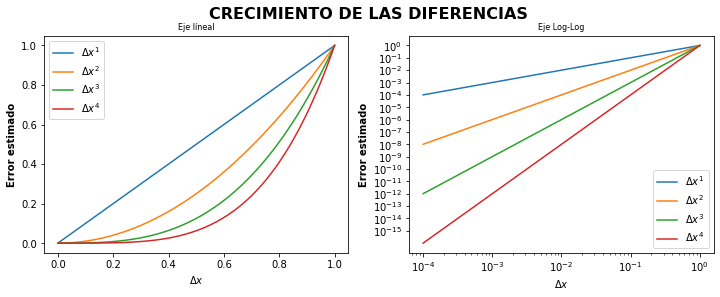

In [10]:
# Vector de variable independiente
dx = np.linspace(1.0, 1e-4, 100)

# Gráfica en el plano de el cambio de la variable dependiente con el cambio de la variable independiente
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Crecimiento de las diferencias".upper(), fontsize=16, fontweight="bold")

axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))

# Vectores de variable dependiente dy = dx^n
for n in range(1, 5): # [1, 2, 3, 4]
    axes[0].plot(dx, dx**n, label="$\Delta x^%s$" % n)
    axes[1].loglog(dx, dx**n, label="$\Delta x^%s$" % n)


# Escalando la gráfica
axes[1].set_xticks([10.0**(-n) for n in range(5)])
axes[1].set_yticks([10.0**(-n) for n in range(16)])

# Textos que aparecen en la gráfica
axes[0].set_title("Eje líneal", fontsize=8)
axes[0].set_xlabel("$\Delta x$", fontweight="bold")
axes[0].set_ylabel("Error estimado", fontweight="bold")
axes[0].legend(loc=2)

axes[1].set_title("Eje Log-Log", fontsize=8)
axes[1].set_xlabel("$\Delta x$", fontweight="bold")
axes[1].set_ylabel("Error estimado", fontweight="bold")
axes[1].legend(loc=4)

plt.show()

---
## Mas Recursos

- [Propagación de errores](https://en.wikipedia.org/wiki/Rounding) (Wikipedia)
- [Método iterativo](https://es.wikipedia.org/wiki/M%C3%A9todo_iterativo) (Wikipedia)
- [Estabilidad numérica](https://es.wikipedia.org/wiki/Estabilidad_num%C3%A9rica) (Wikipedia)
- [Orden de convergencia](https://es.wikipedia.org/wiki/Orden_de_convergencia) (Wikipedia)
